#Data Loading and Preprocessing




In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
flights = pd.read_csv("/content/drive/MyDrive/Airline_Delay_Cause.csv")
flights.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [64]:
df = flights.copy()

In [65]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,179338.000000,179338.000000,178997.000000,178747.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
mean,2019.480082,6.485725,327.816969,58.709086,18.572643,2.035742,17.094929,0.145307,20.778477,6.830103,0.779572,3863.310676,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,2.410204,3.463516,931.001446,164.378035,47.389651,6.894812,56.279604,0.702149,64.912766,41.446756,3.490499,11902.153241,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,41.000000,6.000000,1.960000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,288.000000,91.000000,0.000000,28.000000,0.000000,54.000000
50%,2020.000000,6.000000,89.000000,15.000000,5.400000,0.220000,3.300000,0.000000,4.290000,1.000000,0.000000,900.000000,321.000000,12.000000,124.000000,0.000000,286.000000
75%,2022.000000,9.000000,218.000000,40.000000,14.700000,1.620000,9.860000,0.000000,13.010000,3.000000,1.000000,2547.000000,986.000000,131.000000,401.000000,0.000000,964.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,160.000000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [66]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,341
arr_del15,591
carrier_ct,341
weather_ct,341


In [67]:
cols_with_341_nulls = [
    'arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
    'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'
]

In [68]:
df = df.dropna(subset=cols_with_341_nulls, how='all')

In [69]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,250
carrier_ct,0
weather_ct,0


In [70]:
df.shape

(178997, 21)

In [71]:
df = df.dropna(subset=['arr_del15'])

In [72]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [73]:
df['month'] = df['month'].astype(str).str.zfill(2)

# Year ko string me convert kar liya
df['year'] = df['year'].astype(str)

# Month aur Year ko combine karke ek naya column bana rahe hain
df['Month_Year'] = df['month'] + '/' + df['year']

In [74]:
df.drop(['month', 'year'], axis=1, inplace=True)

In [75]:
df = df[['Month_Year'] + [col for col in df.columns if col != 'Month_Year']]

In [76]:
 df.head()

,Month_Year,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,12/2023,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,0.73,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,12/2023,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,1.00,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,12/2023,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,1.06,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,12/2023,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,0.00,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,12/2023,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,52.43,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


#EDA

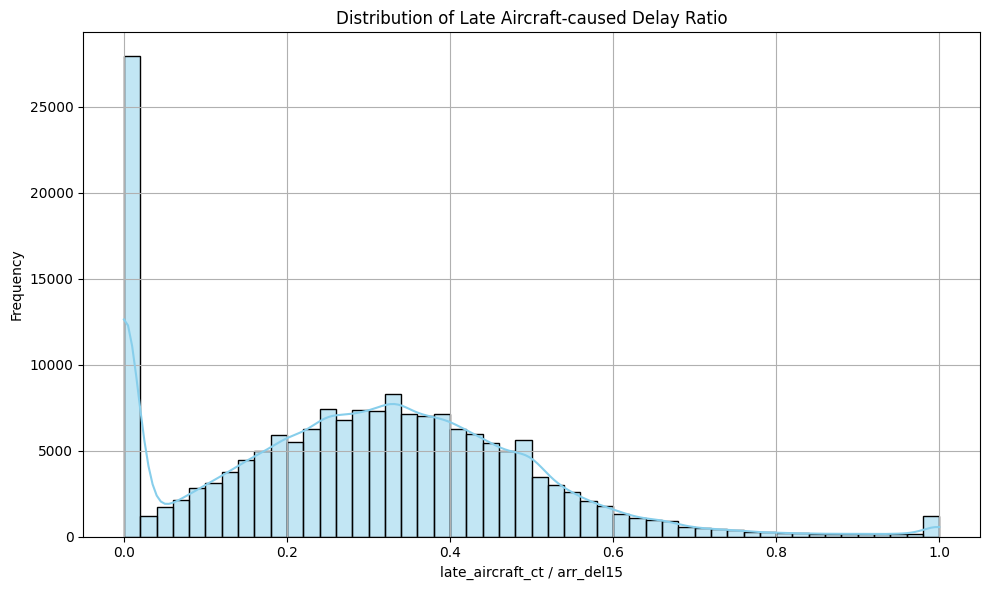

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create new ratio column
df['late_aircraft_ct_ratio'] = df['late_aircraft_ct'] / (df['arr_del15'] + 1e-6)

# Filter out extreme values for clean plot
df_filtered = df[df['late_aircraft_ct_ratio'] < 2]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['late_aircraft_ct_ratio'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Late Aircraft-caused Delay Ratio")
plt.xlabel("late_aircraft_ct / arr_del15")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Among all delayed flights, late arrival of previous aircraft contributes to 20–40% delays in most cases. In rare but critical scenarios, this factor alone causes 100% of the delay, indicating a significant impact of aircraft turnaround inefficiencies.

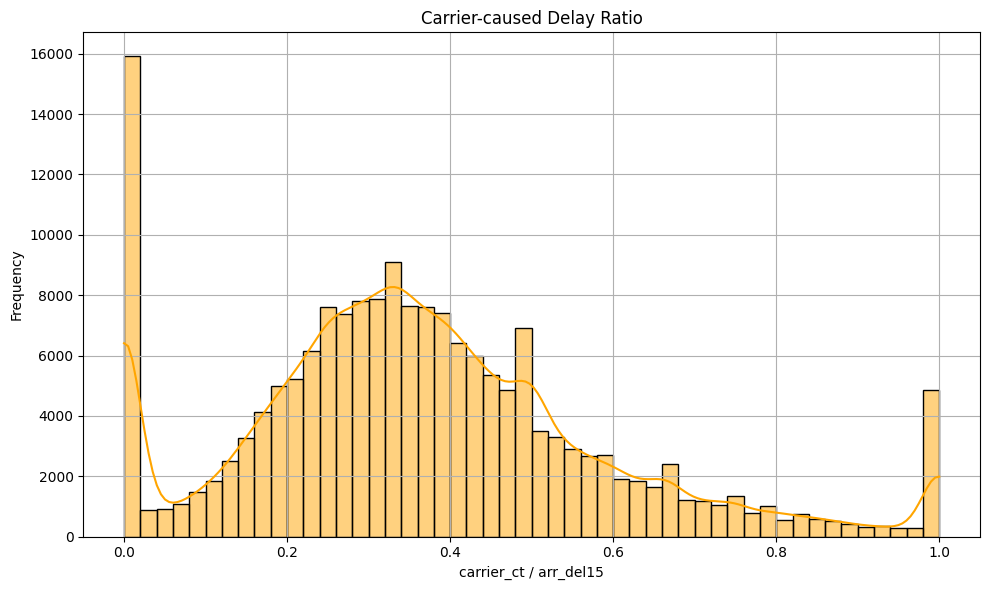

In [78]:
df['carrier_ct_ratio'] = df['carrier_ct'] / (df['arr_del15'] + 1e-6)
df_filtered = df[df['carrier_ct_ratio'] < 2]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['carrier_ct_ratio'], bins=50, kde=True, color='orange')
plt.title("Carrier-caused Delay Ratio")
plt.xlabel("carrier_ct / arr_del15")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Most records have ratio between 0.2 to 0.5 → yani 20–50% delays me airline ka role tha.

Kuch rows me ratio 0 ke aas paas hai → unme carrier responsible nahi tha.

Rare cases me ratio ~1 → almost saari delay carrier ki wajah se.



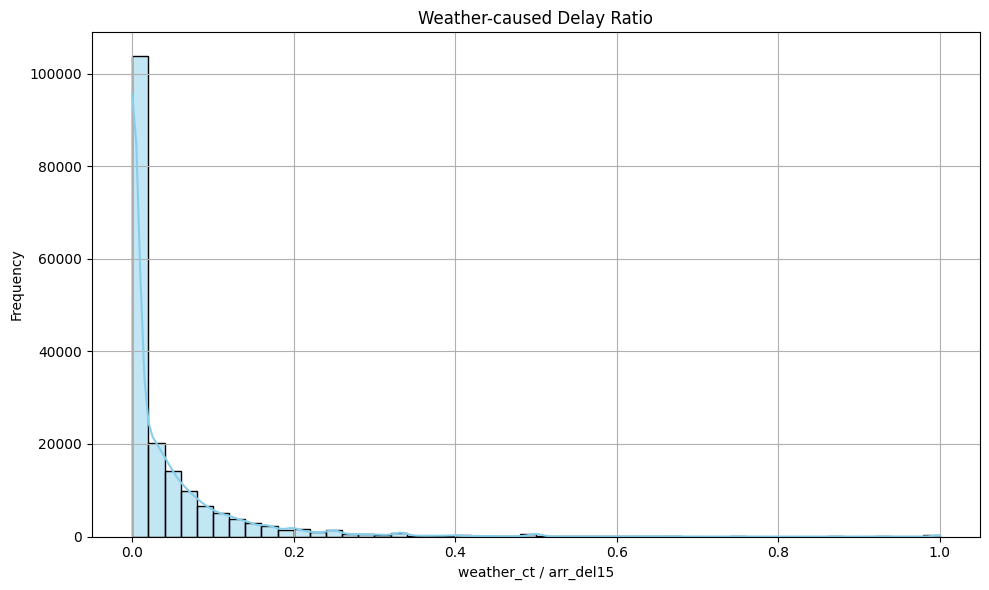

In [79]:
df['weather_ct_ratio'] = df['weather_ct'] / (df['arr_del15'] + 1e-6)
df_filtered = df[df['weather_ct_ratio'] < 2]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['weather_ct_ratio'], bins=50, kde=True, color='skyblue')
plt.title("Weather-caused Delay Ratio")
plt.xlabel("weather_ct / arr_del15")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Across the dataset, weather rarely appears as the dominant reason for delays. Over 90% of delayed flights show zero contribution from weather, confirming that operational and system-related causes are more influential than environmental ones.

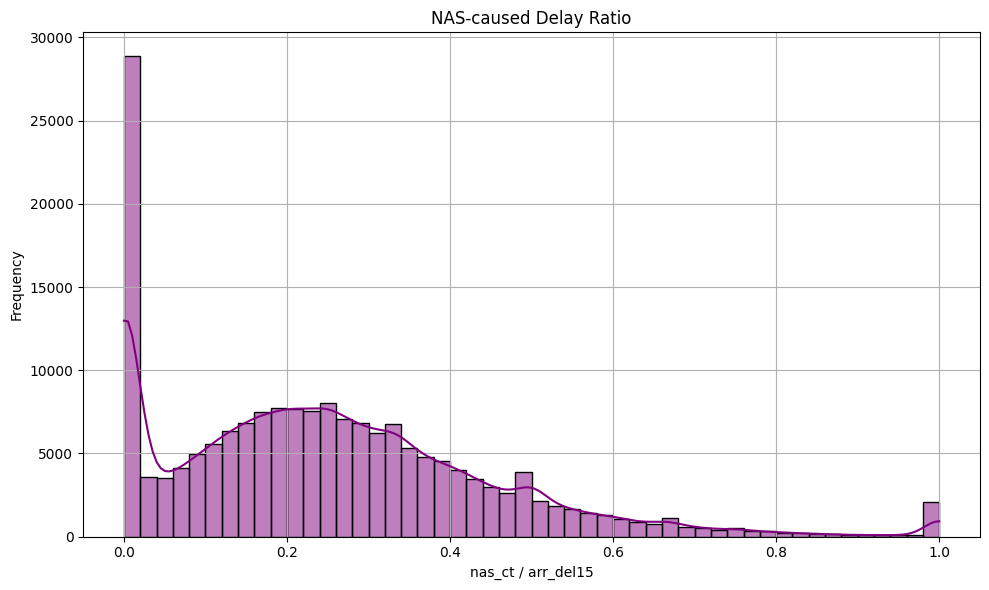

In [80]:
df['nas_ct_ratio'] = df['nas_ct'] / (df['arr_del15'] + 1e-6)
df_filtered = df[df['nas_ct_ratio'] < 2]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['nas_ct_ratio'], bins=50, kde=True, color='purple')
plt.title("NAS-caused Delay Ratio")
plt.xlabel("nas_ct / arr_del15")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


NAS-related issues contribute to 15–40% of delays in a significant portion of airport-carrier combinations. Though not the most dominant cause, NAS delays occur consistently across the dataset, hinting at systemic inefficiencies such as traffic congestion, rerouting, and ATC management.

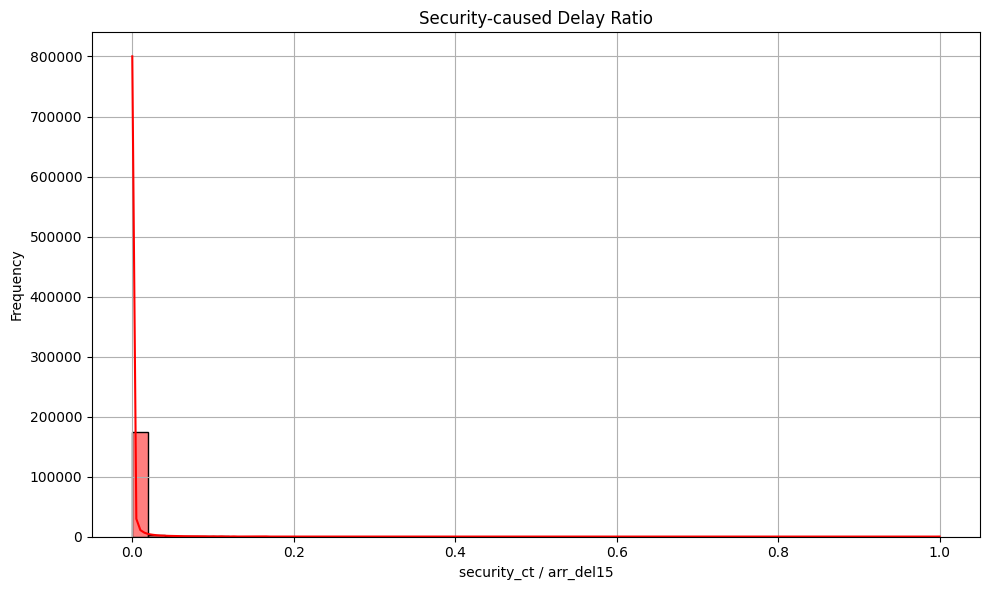

In [81]:
df['security_ct_ratio'] = df['security_ct'] / (df['arr_del15'] + 1e-6)
df_filtered = df[df['security_ct_ratio'] < 2]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['security_ct_ratio'], bins=50, kde=True, color='red')
plt.title("Security-caused Delay Ratio")
plt.xlabel("security_ct / arr_del15")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Security-related delays are almost nonexistent across the dataset. The frequency distribution confirms that over 99.9% of delay cases had no contribution from security issues, indicating that aviation security operations are generally efficient and not a common bottleneck

In [82]:
df['carrier_ratio'] = df['carrier_ct'] / df['arr_del15']
df['weather_ratio'] = df['weather_ct'] / df['arr_del15']
df['nas_ratio'] = df['nas_ct'] / df['arr_del15']
df['security_ratio'] = df['security_ct'] / df['arr_del15']
df['late_aircraft_ratio'] = df['late_aircraft_ct'] / df['arr_del15']


In [83]:
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
for cause in delay_causes:
    ratio_col = cause.replace('_ct', '_ratio')
    df[ratio_col] = df[cause] / df['arr_del15']
    df[ratio_col] = df[ratio_col].fillna(0)  # If arr_del15 is 0


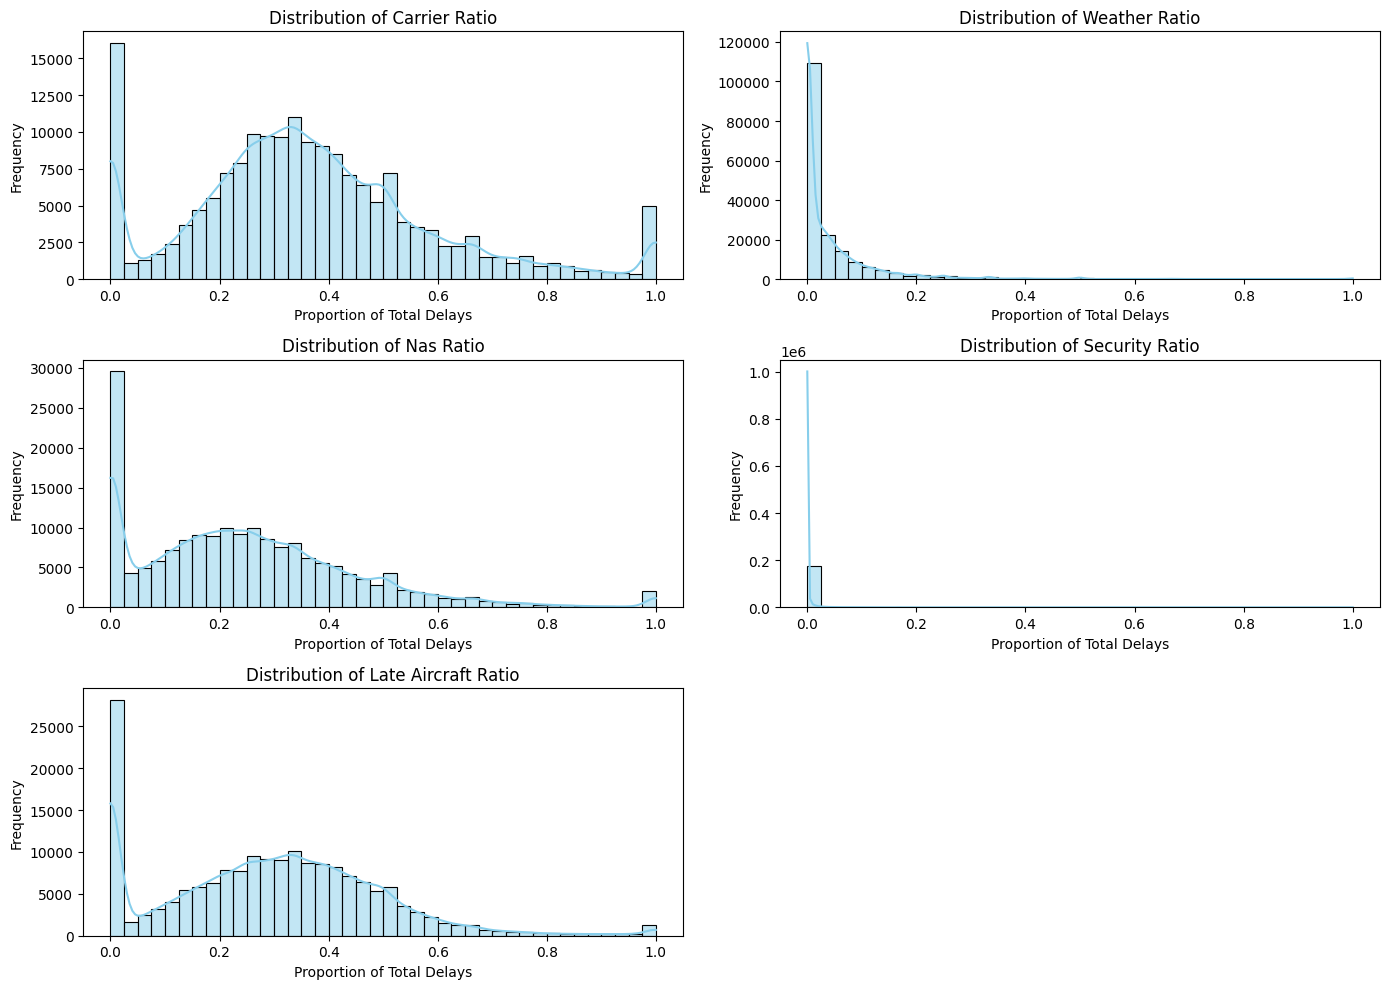

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

delay_ratios = ['carrier_ratio', 'weather_ratio', 'nas_ratio', 'security_ratio', 'late_aircraft_ratio']
plt.figure(figsize=(14, 10))
for i, col in enumerate(delay_ratios):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], bins=40, kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel('Proportion of Total Delays')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Most flights experience little to no weather or security delay, but carrier, NAS, and late aircraft delays are major contributors.



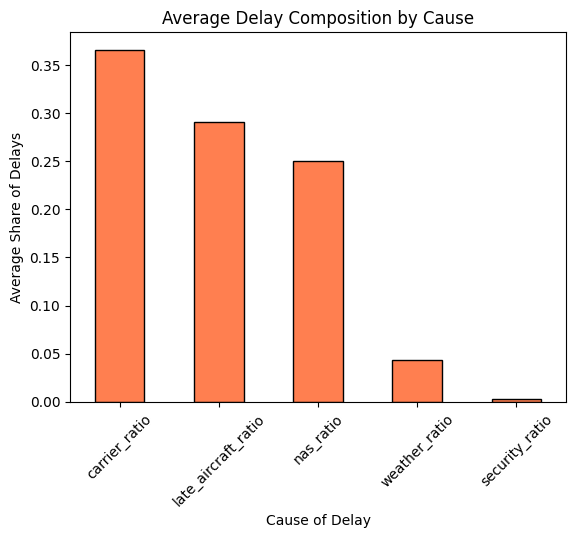

In [85]:
average_contribution = df[delay_ratios].mean().sort_values(ascending=False)
average_contribution.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Average Delay Composition by Cause")
plt.ylabel("Average Share of Delays")
plt.xlabel("Cause of Delay")
plt.xticks(rotation=45)
plt.show()


Operational inefficiencies (carrier, NAS, and aircraft turnaround) dominate delays — not external events like weather or security.

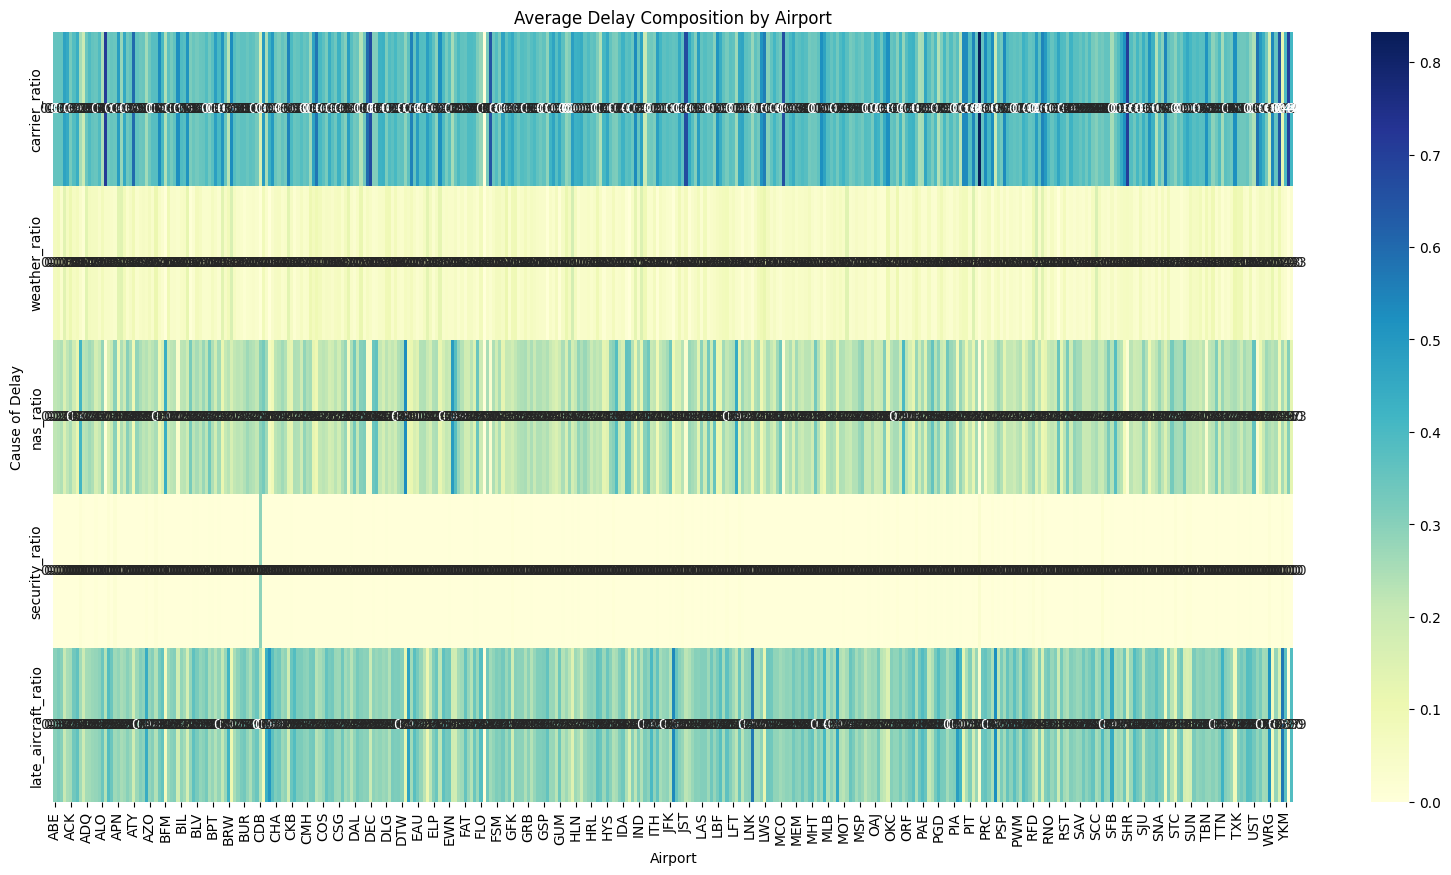

In [86]:
df_grouped = df.groupby('airport')[delay_ratios].mean()

# Heatmap: which airport suffers from which type of delay
plt.figure(figsize=(20, 10))
sns.heatmap(df_grouped.T, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average Delay Composition by Airport")
plt.xlabel("Airport")
plt.ylabel("Cause of Delay")
plt.show()


 Each airport has a unique delay profile, which could guide airport-specific operational improvements.

In [87]:
delay_columns = ['carrier_ratio', 'late_aircraft_ratio', 'nas_ratio', 'weather_ratio', 'security_ratio']
df[delay_columns] = df[delay_columns].apply(pd.to_numeric, errors='coerce')
df_cleaned = df[delay_columns].dropna()


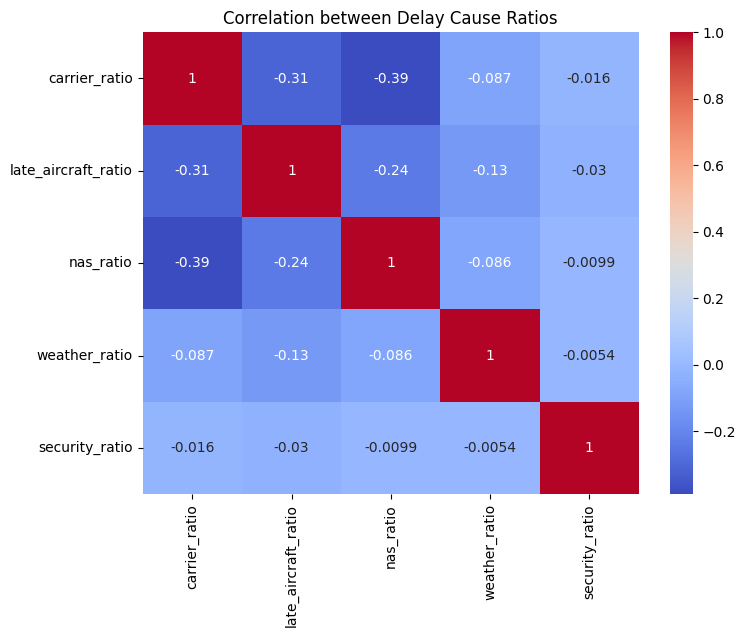

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Delay Cause Ratios")
plt.show()


The correlation analysis among the delay cause ratios reveals weak to moderate negative correlations, particularly between carrier_ratio and both nas_ratio (-0.39) and late_aircraft_ratio (-0.31). This trend is expected since these ratios represent the share of total delays attributed to each cause, and therefore naturally compete with each other in proportion. Notably, the correlations with weather_ratio and security_ratio are near zero, indicating their impact on delays tends to be independent and minimal compared to other causes. This reinforces earlier findings where carrier- and aircraft-related issues emerged as the dominant delay contributors.

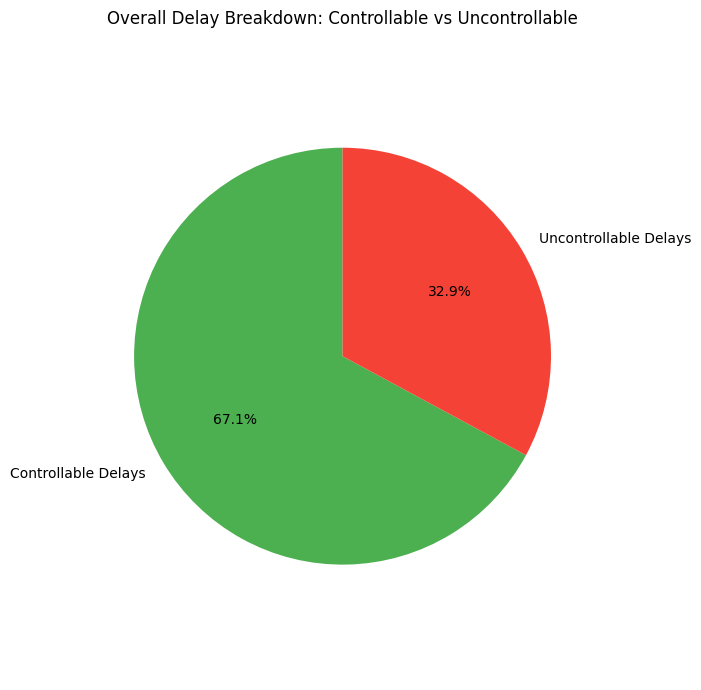

In [89]:
# Total delay counts (summing across entire dataset)
total_delays = df[['carrier_ct', 'late_aircraft_ct', 'weather_ct', 'nas_ct', 'security_ct']].sum()

# Categorize
controllable = total_delays['carrier_ct'] + total_delays['late_aircraft_ct']
uncontrollable = total_delays['weather_ct'] + total_delays['nas_ct'] + total_delays['security_ct']

# Pie chart data
labels = ['Controllable Delays', 'Uncontrollable Delays']
sizes = [controllable, uncontrollable]
colors = ['#4CAF50', '#F44336']

# Plot
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Overall Delay Breakdown: Controllable vs Uncontrollable")
plt.axis('equal')
plt.tight_layout()
plt.show()


             Type  Total Delay Minutes
0    Controllable          506096310.0
1  Uncontrollable          185423467.0


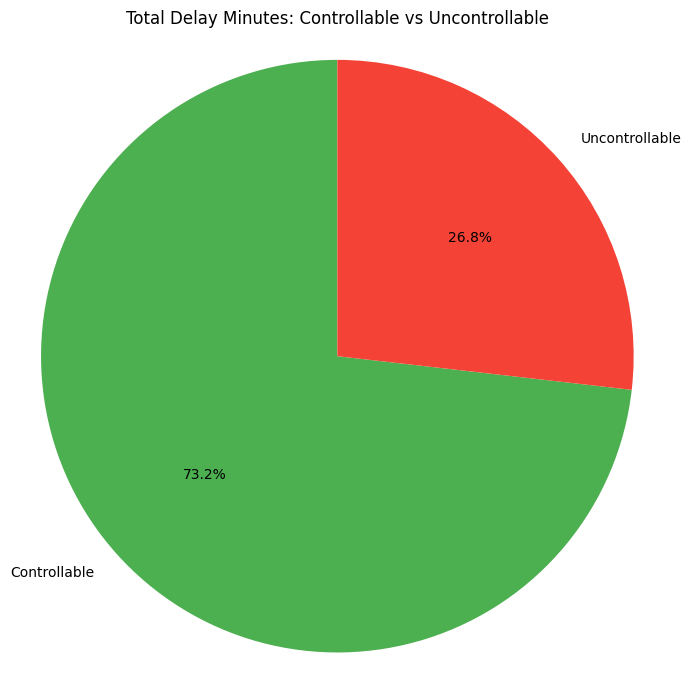

In [90]:
# Calculate total minutes delayed by each cause
delay_minutes = df[['carrier_delay', 'late_aircraft_delay', 'weather_delay', 'nas_delay', 'security_delay']].sum()

# Group into controllable vs uncontrollable
controllable_min = delay_minutes['carrier_delay'] + delay_minutes['late_aircraft_delay']
uncontrollable_min = delay_minutes['weather_delay'] + delay_minutes['nas_delay'] + delay_minutes['security_delay']

# Create dataframe for display or plotting
delay_breakdown = pd.DataFrame({
    'Type': ['Controllable', 'Uncontrollable'],
    'Total Delay Minutes': [controllable_min, uncontrollable_min]
})

# Display breakdown
print(delay_breakdown)

# Optional: Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(delay_breakdown['Total Delay Minutes'], labels=delay_breakdown['Type'], autopct='%1.1f%%',
        colors=['#4CAF50', '#F44336'], startangle=90)
plt.title("Total Delay Minutes: Controllable vs Uncontrollable")
plt.axis('equal')
plt.tight_layout()
plt.show()


Out of the total delay minutes recorded, approximately 73.2% were due to controllable reasons such as carrier operations and late-arriving aircraft, highlighting major areas where operational improvements can reduce delays. The remaining 26.8% were due to uncontrollable causes like weather, NAS congestion, or security, requiring systemic resilience.

                 Cause  Total Delay Minutes  Percentage Share
0        carrier_delay          237268793.0         34.311209
1        weather_delay           37430676.0          5.412814
2            nas_delay          146768462.0         21.224044
3       security_delay            1224329.0          0.177049
4  late_aircraft_delay          268827517.0         38.874885


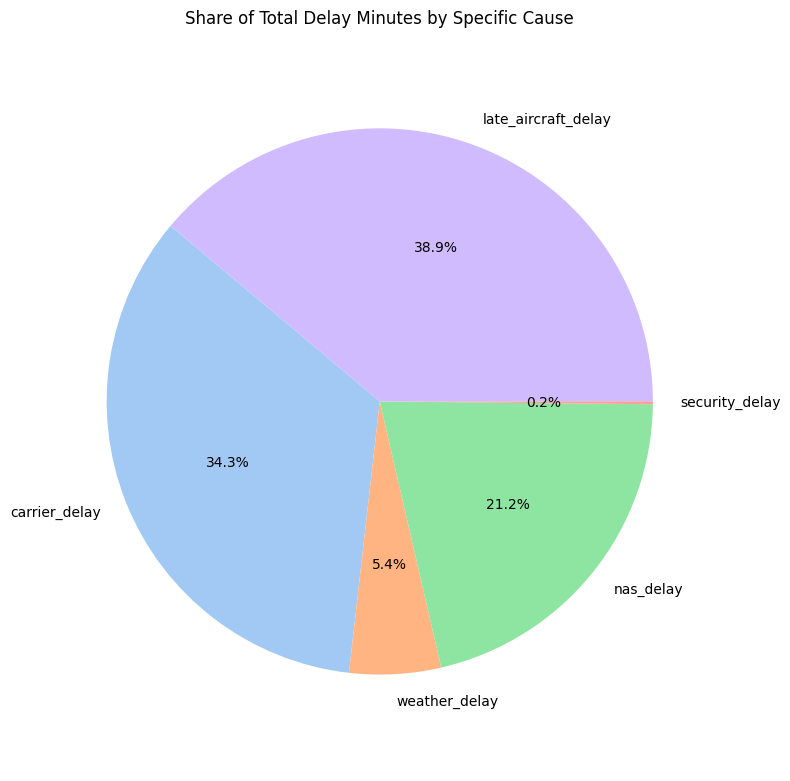

In [91]:
# Sum delay minutes for each cause
cause_delay_minutes = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()

# Convert to DataFrame
cause_delay_df = cause_delay_minutes.reset_index()
cause_delay_df.columns = ['Cause', 'Total Delay Minutes']

# Calculate % share
cause_delay_df['Percentage Share'] = 100 * cause_delay_df['Total Delay Minutes'] / cause_delay_df['Total Delay Minutes'].sum()

# Display table
print(cause_delay_df)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(cause_delay_df['Total Delay Minutes'],
        labels=cause_delay_df['Cause'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel'))
plt.title("Share of Total Delay Minutes by Specific Cause")
plt.axis('equal')
plt.tight_layout()
plt.show()


The major contributor to total delay minutes is Late Aircraft (38.9%), followed by Carrier-related issues (34.3%). These controllable factors together account for nearly 73% of all delay minutes, highlighting significant scope for operational improvements. In contrast, uncontrollable causes like NAS (21.2%), Weather (5.4%), and Security (0.2%) make up the remaining 27%, indicating that while external factors matter, most delays can be addressed internally by airlines.

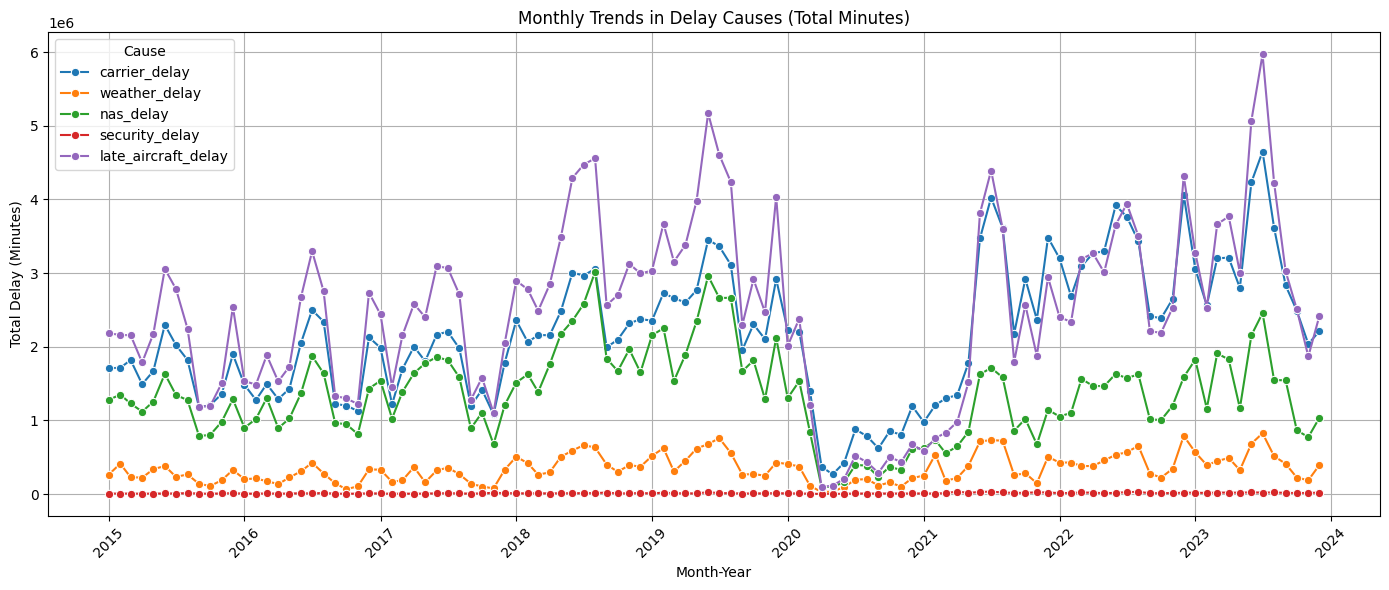

In [92]:
# Group delay minutes by Month_Year
monthly_delay = df.groupby('Month_Year')[
    ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
].sum().reset_index()

# Sort Month_Year as datetime for correct order
monthly_delay['Month_Year'] = pd.to_datetime(monthly_delay['Month_Year'], format='%m/%Y')

# Melt for plotting
monthly_melted = monthly_delay.melt(id_vars='Month_Year', var_name='Cause', value_name='Delay_Minutes')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_melted, x='Month_Year', y='Delay_Minutes', hue='Cause', marker='o')
plt.title("Monthly Trends in Delay Causes (Total Minutes)")
plt.xlabel("Month-Year")
plt.ylabel("Total Delay (Minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


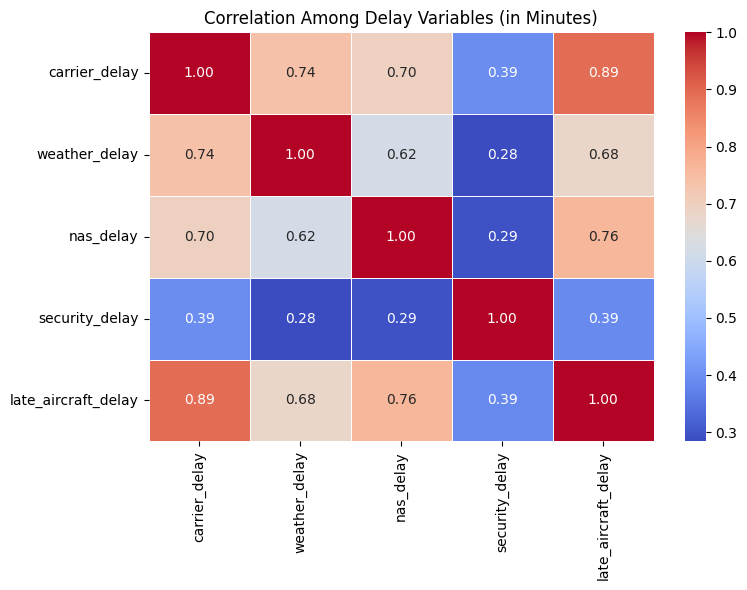

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select delay variables (minutes)
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Calculate correlation matrix
corr_matrix = df[delay_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Among Delay Variables (in Minutes)")
plt.tight_layout()
plt.show()


#Feature Engineering

In [94]:
# 1. Classification target
df['is_delayed'] = (df['arr_del15'] / (df['arr_flights'] + 1e-6) > 0.1).astype(int)

# 2. Regression target
df['avg_arrival_delay'] = df['arr_delay'] / (df['arr_flights'] + 1e-6)

In [95]:
# Keep these as they are (already normalized)
df['carrier_ct_avg'] = df['carrier_ct']           # no ratio
df['weather_ct_avg'] = df['weather_ct']
df['nas_ct_avg'] = df['nas_ct']
df['security_ct_avg'] = df['security_ct']
df['late_aircraft_ct_avg'] = df['late_aircraft_ct']

In [96]:
# ⚙️ 2. Controllable Operational Features

df['carrier_delay_per_flight'] = df['carrier_delay'] / (df['arr_flights'] + 1e-6)
df['late_aircraft_delay_per_flight'] = df['late_aircraft_delay'] / (df['arr_flights'] + 1e-6)


In [97]:
# 🌦️ 3. Uncontrollable Delay Features
df['weather_delay_per_flight'] = df['weather_delay'] / (df['arr_flights'] + 1e-6)
df['nas_delay_per_flight'] = df['nas_delay'] / (df['arr_flights'] + 1e-6)
df['security_delay_per_flight'] = df['security_delay'] / (df['arr_flights'] + 1e-6)

In [98]:
# 🛬 4. Operational Health Indicators
df['cancel_rate'] = df['arr_cancelled'] / (df['arr_flights'] + 1e-6)
df['divert_rate'] = df['arr_diverted'] / (df['arr_flights'] + 1e-6)

In [99]:
# Convert Month_Year to datetime
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format='%m/%Y')

# Extract numeric month and year
df['month'] = df['Month_Year'].dt.month
df['year'] = df['Month_Year'].dt.year
df = df.drop(columns=['Month_Year'])
# 📅 5. Seasonal Effects
df['is_peak_month'] = df['month'].isin([6, 7, 11, 12]).astype(int)
df['is_winter'] = df['month'].isin([1, 2, 12]).astype(int)

In [100]:
# 🧹 6. Drop Raw Columns (Already Used to Make Features)
df.drop(columns=[
    'arr_delay',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
    'arr_cancelled', 'arr_diverted'
], inplace=True)

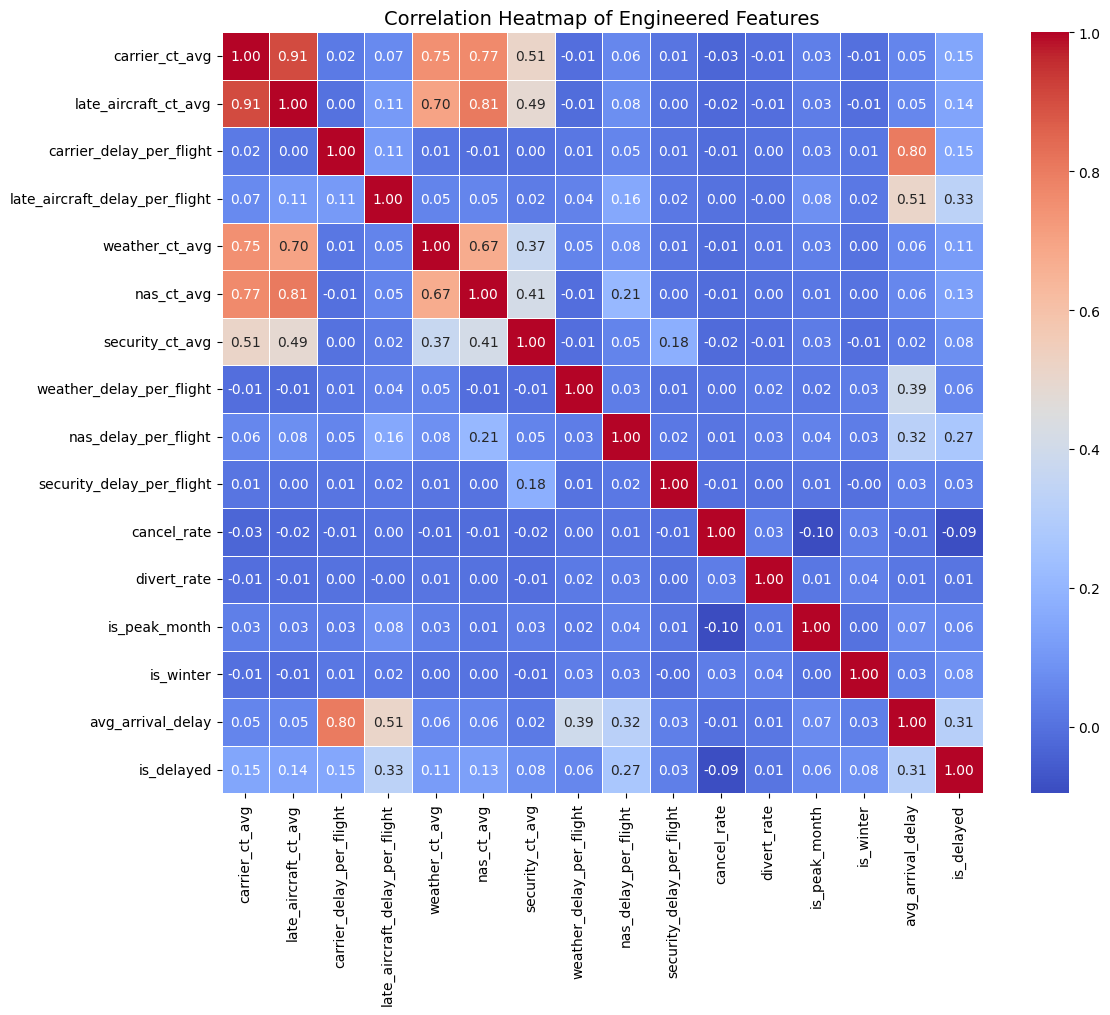

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns (same as before)
engineered_cols = [
    'carrier_ct_avg', 'late_aircraft_ct_avg',
    'carrier_delay_per_flight', 'late_aircraft_delay_per_flight',
    'weather_ct_avg', 'nas_ct_avg', 'security_ct_avg',
    'weather_delay_per_flight', 'nas_delay_per_flight', 'security_delay_per_flight',
    'cancel_rate', 'divert_rate',
    'is_peak_month', 'is_winter',
    'avg_arrival_delay', 'is_delayed'
]

# Correlation matrix
corr_matrix = df[engineered_cols].corr()

# Plot with vertical labels
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Engineered Features", fontsize=14)
plt.tight_layout()
plt.show()


In [102]:
df['month_num'] = df['month']
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

In [103]:
from sklearn.preprocessing import LabelEncoder
le_carrier = LabelEncoder()
df['carrier_enc'] = le_carrier.fit_transform(df['carrier'].astype(str))


In [104]:
le_airport = LabelEncoder()
df['airport_enc'] = le_airport.fit_transform(df['airport_name'].astype(str))

In [105]:
features_cls = [
    'month_sin', 'month_cos', 'carrier_enc', 'is_peak_month', 'is_winter' ,'cancel_rate' ,'divert_rate', 'airport_enc',
    'arr_flights' # Keeping these for now
]
target_cls = 'is_delayed'

X_cls = df[features_cls]
y_cls = df[target_cls]

#Model Training

In [45]:
#Train/Test Split (Stratified)
from sklearn.model_selection import train_test_split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, stratify=y_cls, random_state=42
)

In [47]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data (existing)

smote = SMOTE(random_state=42, sampling_strategy=0.75)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cls, y_train_cls)
print(f"Original training samples: {len(X_train_cls)}")
print(f"Resampled training samples: {len(X_train_resampled)}")
print(f"Class distribution after SMOTE (0: Not Delayed, 1: Delayed):")
print(pd.Series(y_train_resampled).value_counts())

Original training samples: 142997
Resampled training samples: 191327
Class distribution after SMOTE (0: Not Delayed, 1: Delayed):
is_delayed
1    109330
0     81997
Name: count, dtype: int64


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_cls)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # Support Vector Classifier (note: can be slow on large datasets)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier # Requires: pip install xgboost
from lightgbm import LGBMClassifier # Requires: pip install lightgbm
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score

In [56]:
models = {
    "Logistic Regression": {
        "estimator": LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000),
        "param_grid": {
            'C': [0.1, 1.0, 10.0]
        },
        "data": (X_train_resampled_scaled, X_test_scaled) # Use scaled data
    },
    "Decision Tree": {
        "estimator": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        "param_grid": {
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 10]
        },
        "data": (X_train_resampled, X_test_cls) # Use unscaled data for tree-based models
    },
    "K-Nearest Neighbors": {
        "estimator": KNeighborsClassifier(),
        "param_grid": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        },
        "data": (X_train_resampled_scaled, X_test_scaled) # Use scaled data
    },

    "Random Forest": {
        "estimator": RandomForestClassifier(random_state=42, class_weight='balanced'),
        "param_grid": {
            'n_estimators': [100, 200],
            'max_depth': [10, 20], # Reduced None for faster tuning
            'max_features': ['sqrt', 'log2']
        },
        "data": (X_train_resampled, X_test_cls) # Use unscaled data
    },
    "Gradient Boosting": {
        "estimator": GradientBoostingClassifier(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.2], # Reduced range for faster tuning
            'max_depth': [3, 5]
        },
        "data": (X_train_resampled, X_test_cls) # Use unscaled data
    },
    "XGBoost": {
        "estimator": XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
        "param_grid": {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.2],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        },
        "data": (X_train_resampled, X_test_cls) # Use unscaled data
    },
    "LightGBM": {
        "estimator": LGBMClassifier(random_state=42, objective='binary'),
        "param_grid": {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.2],
            'num_leaves': [20, 31], # Smaller than max_depth
            'max_depth': [5, 10] # Added max_depth for control
        },
        "data": (X_train_resampled, X_test_cls) # Use unscaled data
    }
}

best_models = {}

for model_name, config in models.items():
    print(f"\n{'='*50}\nTraining {model_name}...\n{'='*50}")

    estimator = config["estimator"]
    param_grid = config["param_grid"]
    X_train_data, X_test_data = config["data"]

    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=3,
        scoring='f1', # Optimize for F1-score given imbalance
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X_train_data, y_train_resampled)
    best_estimator = grid_search.best_estimator_
    best_models[model_name] = best_estimator

    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")

    # Evaluate the best estimator
    y_pred = best_estimator.predict(X_test_data)
    y_proba = best_estimator.predict_proba(X_test_data)[:, 1]

    print(f"\n📊 Final Classification Report for {model_name}:")
    print(classification_report(y_test_cls, y_pred))

    print(f"\n📊 Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test_cls, y_pred))

    print(f"\n🎯 ROC AUC Score for {model_name}:", roc_auc_score(y_test_cls, y_proba))

    # Save the best model
    model_filename = f"best_{model_name.lower().replace(' ', '_')}_classifier.pkl"
    joblib.dump(best_estimator, model_filename)
    print(f"\nBest {model_name} model saved as '{model_filename}'")

print("\n\nAll models trained and evaluated!")


Training Logistic Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best parameters for Logistic Regression: {'C': 10.0}

📊 Final Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.30      0.64      0.40      8417
           1       0.83      0.53      0.64     27333

    accuracy                           0.55     35750
   macro avg       0.56      0.58      0.52     35750
weighted avg       0.70      0.55      0.59     35750


📊 Confusion Matrix for Logistic Regression:
[[ 5412  3005]
 [12929 14404]]

🎯 ROC AUC Score for Logistic Regression: 0.6116313125016406

Best Logistic Regression model saved as 'best_logistic_regression_classifier.pkl'

Training Decision Tree...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}

📊 Final Classification Report for Decision Tree:
              precision    recall  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:23:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

📊 Final Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.62      0.36      0.45      8417
           1       0.83      0.93      0.88     27333

    accuracy                           0.80     35750
   macro avg       0.72      0.65      0.67     35750
weighted avg       0.78      0.80      0.78     35750


📊 Confusion Matrix for XGBoost:
[[ 3020  5397]
 [ 1849 25484]]

🎯 ROC AUC Score for XGBoost: 0.7989859323097452

Best XGBoost model saved as 'best_xgboost_classifier.pkl'

Training LightGBM...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 109330, number of negative: 81997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 155

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler # StandardScaler added for some models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib # For saving models

# Import different regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR # Support Vector Regressor (Warning: Very slow on large datasets)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor # Requires: pip install xgboost
from lightgbm import LGBMRegressor # Requires: pip install lightgbm


# 1a. Encode month cyclically
df['month_num'] = df['month']
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

# 1b. Encode carrier
le_carrier = LabelEncoder()
df['carrier_enc'] = le_carrier.fit_transform(df['carrier'].astype(str))

# 1c. Add holiday month feature
df['is_peak_month'] = df['month_num'].isin([7, 8, 12]).astype(int)

# 1d. Encode airport_name
le_airport = LabelEncoder()
df['airport_enc'] = le_airport.fit_transform(df['airport_name'].astype(str))

# --- Handle missing values for numerical features and prepare for new target ---
numerical_features_to_check = [
    'arr_flights', 'arr_cancelled', 'arr_diverted', 'arr_delay',
    'carrier_ct_avg', 'weather_ct_avg', 'nas_ct_avg', 'security_ct_avg', 'late_aircraft_ct_avg'
]
for col in numerical_features_to_check:
    if col in df.columns and df[col].isnull().any():
        df[col] = df[col].fillna(0)






# ---------------------------------------------
# ✅ Step 2: Define features & target (Consistent)
# ---------------------------------------------
features_reg = [
    'month_sin', 'month_cos', 'carrier_enc', 'is_peak_month', 'airport_enc',
    'arr_flights',
    'is_winter' ,'cancel_rate' ,'divert_rate',
    'carrier_ct_avg', 'weather_ct_avg', 'nas_ct_avg', 'security_ct_avg', 'late_aircraft_ct_avg'
]
target_reg_name = 'avg_arrival_delay'

X_reg = df[features_reg]
y_reg = df[target_reg_name].copy()

# --- Crucial for Regression Target: Transform Target Variable ---
y_reg[y_reg < 0] = 0 # Cap negative delays at 0
y_reg_transformed = np.log1p(y_reg) # Log transform for better distribution


# ---------------------------------------------
# 📊 Step 3: Train/Test Split (Consistent)
# ---------------------------------------------
X_train_reg, X_test_reg, y_train_reg_transformed, y_test_reg_transformed = train_test_split(
    X_reg, y_reg_transformed, test_size=0.2, random_state=42
)
# Keep original y_test for MAE/RMSE calculation after inverse transform
_, _, _, y_test_reg_original_scale = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale numerical features (only for models sensitive to scale)
scaler = StandardScaler()
# Fit scaler only on training features, then transform both train and test
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


# ---------------------------------------------
# 🔧 Step 4 & 5: Train & Evaluate Multiple Regression Models
# ---------------------------------------------

models_reg = {
    "Linear Regression": {
        "estimator": LinearRegression(),
        "param_grid": {}, # No hyperparameters for basic LinearRegression
        "data": (X_train_reg_scaled, X_test_reg_scaled) # Use scaled data
    },
    "Decision Tree Regressor": {
        "estimator": DecisionTreeRegressor(random_state=42),
        "param_grid": {
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 10]
        },
        "data": (X_train_reg, X_test_reg) # Use unscaled data for tree-based
    },
    "K-Nearest Neighbors Regressor": {
        "estimator": KNeighborsRegressor(),
        "param_grid": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        },
        "data": (X_train_reg_scaled, X_test_reg_scaled) # Use scaled data
    },
    "Random Forest Regressor": {
        "estimator": RandomForestRegressor(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200],
            'max_depth': [10, 20],
            'max_features': [0.7, 1.0] # Changed to float for fractions
        },
        "data": (X_train_reg, X_test_reg) # Use unscaled data
    },
    "Gradient Boosting Regressor": {
        "estimator": GradientBoostingRegressor(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [5, 7]
        },
        "data": (X_train_reg, X_test_reg) # Use unscaled data
    },
    "XGBoost Regressor": {
        "estimator": XGBRegressor(random_state=42, eval_metric='rmse', objective='reg:squarederror'),
        "param_grid": {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [5, 7]
        },
        "data": (X_train_reg, X_test_reg) # Use unscaled data
    },
    "LightGBM Regressor": {
        "estimator": LGBMRegressor(random_state=42, objective='regression'),
        "param_grid": {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'num_leaves': [20, 31]
        },
        "data": (X_train_reg, X_test_reg) # Use unscaled data
    }
}

best_reg_models = {}

for model_name, config in models_reg.items():
    print(f"\n{'='*50}\nTraining {model_name}...\n{'='*50}")

    estimator = config["estimator"]
    param_grid = config["param_grid"]
    X_train_data, X_test_data = config["data"]

    # For Linear Regression, skip GridSearchCV as it has no tunable params in this basic setup
    if not param_grid:
        best_estimator = estimator.fit(X_train_data, y_train_reg_transformed)
        print(f"No GridSearchCV for {model_name}.")
    else:
        grid_search = GridSearchCV(
            estimator=estimator,
            param_grid=param_grid,
            cv=3, # Using 3 folds for faster tuning
            scoring='neg_mean_absolute_error', # Optimize for MAE (GridSearchCV minimizes, so use 'neg_')
            verbose=1,
            n_jobs=-1
        )

        grid_search.fit(X_train_data, y_train_reg_transformed)
        best_estimator = grid_search.best_estimator_
        print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")

    best_reg_models[model_name] = best_estimator

    # Evaluate the best estimator
    y_pred_reg_transformed = best_estimator.predict(X_test_data)

    # Inverse transform predictions to get actual average delay minutes
    y_pred_reg = np.expm1(y_pred_reg_transformed)

    # Ensure predictions are non-negative
    y_pred_reg[y_pred_reg < 0] = 0

    # Calculate evaluation metrics using the original scale y_test_reg_original_scale
    mae = mean_absolute_error(y_test_reg_original_scale, y_pred_reg)
    rmse = np.sqrt(mean_squared_error(y_test_reg_original_scale, y_pred_reg))
    r2 = r2_score(y_test_reg_original_scale, y_pred_reg)

    # Print the evaluation metrics
    print(f"\n📊 Regression Model Performance Metrics ({model_name}):")
    print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
    print(f"R-squared (R2): {r2:.2f}")

    # Save the best model
    model_filename = f"best_regressor_{model_name.lower().replace(' ', '_')}.pkl"
    joblib.dump(best_estimator, model_filename)
    print(f"\nBest {model_name} model saved as '{model_filename}'")

print("\n\nAll regression models trained and evaluated!")


Training Linear Regression...
No GridSearchCV for Linear Regression.

📊 Regression Model Performance Metrics (Linear Regression):
Mean Absolute Error (MAE): 6.87 minutes
Root Mean Squared Error (RMSE): 25.02 minutes
R-squared (R2): -1.65

Best Linear Regression model saved as 'best_regressor_linear_regression.pkl'

Training Decision Tree Regressor...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best parameters for Decision Tree Regressor: {'max_depth': 10, 'min_samples_split': 10}

📊 Regression Model Performance Metrics (Decision Tree Regressor):
Mean Absolute Error (MAE): 4.38 minutes
Root Mean Squared Error (RMSE): 14.09 minutes
R-squared (R2): 0.16

Best Decision Tree Regressor model saved as 'best_regressor_decision_tree_regressor.pkl'

Training K-Nearest Neighbors Regressor...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best parameters for K-Nearest Neighbors Regressor: {'n_neighbors': 7, 'weights': 'distance'}

📊 Regression Model Performance Metr

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best parameters for Random Forest Regressor: {'max_depth': 20, 'max_features': 1.0, 'n_estimators': 200}

📊 Regression Model Performance Metrics (Random Forest Regressor):
Mean Absolute Error (MAE): 3.37 minutes
Root Mean Squared Error (RMSE): 12.57 minutes
R-squared (R2): 0.33

Best Random Forest Regressor model saved as 'best_regressor_random_forest_regressor.pkl'

Training Gradient Boosting Regressor...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

📊 Regression Model Performance Metrics (Gradient Boosting Regressor):
Mean Absolute Error (MAE): 3.10 minutes
Root Mean Squared Error (RMSE): 12.38 minutes
R-squared (R2): 0.35

Best Gradient Boosting Regressor model saved as 'best_regressor_gradient_boosting_regressor.pkl'

Training XGBoost Regressor...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best parameters for XGBoost Regressor: {'learning_r

Loaded le_carrier.pkl
Loaded le_airport.pkl


<ipython-input-109-2085771788>:99: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['avg_delay_per_flight'][df['avg_delay_per_flight'] < 0] = 0
<ipython-input-109-2085771788>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy

Classification data split successfully.
Regression data split successfully.
Loaded best_xgboost_classifier.pkl for classification SHAP.
Loaded best_regressor_xgboost_regressor.pkl for regression SHAP.

Performing SHAP analysis for Classification Model...

SHAP Summary Plot for Classification Model:


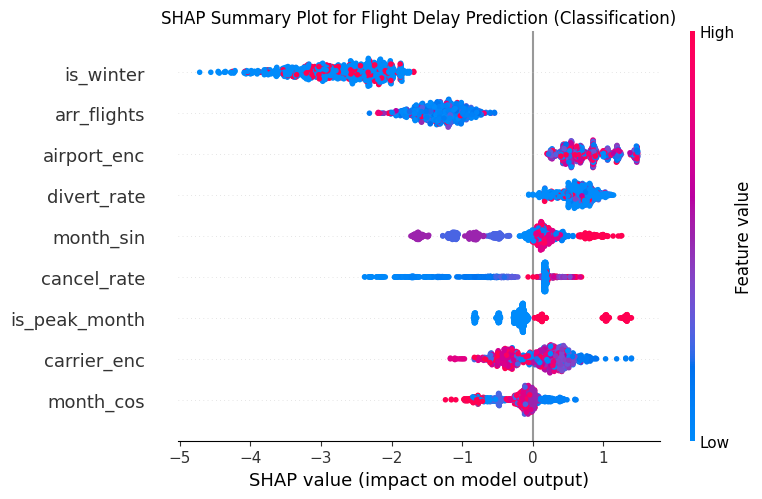


SHAP Dependence Plots for Classification Model (Examples):


<Figure size 800x600 with 0 Axes>

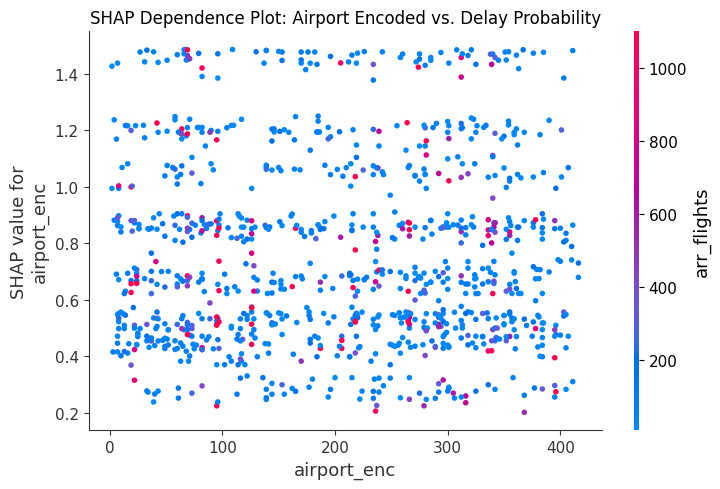

<Figure size 800x600 with 0 Axes>

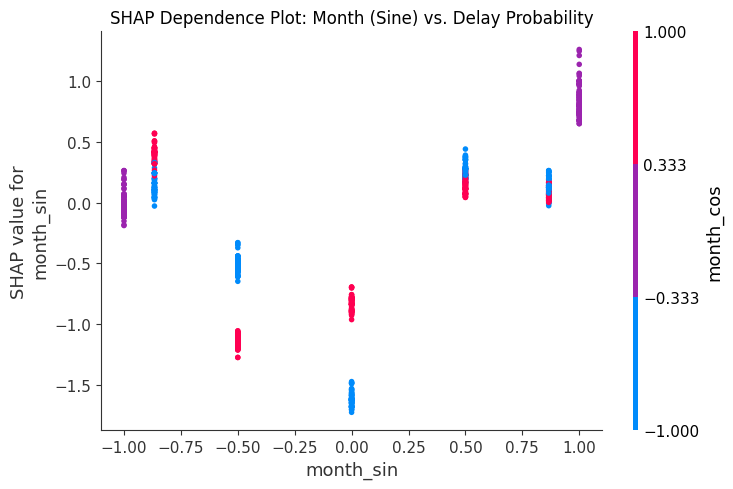

<Figure size 800x600 with 0 Axes>

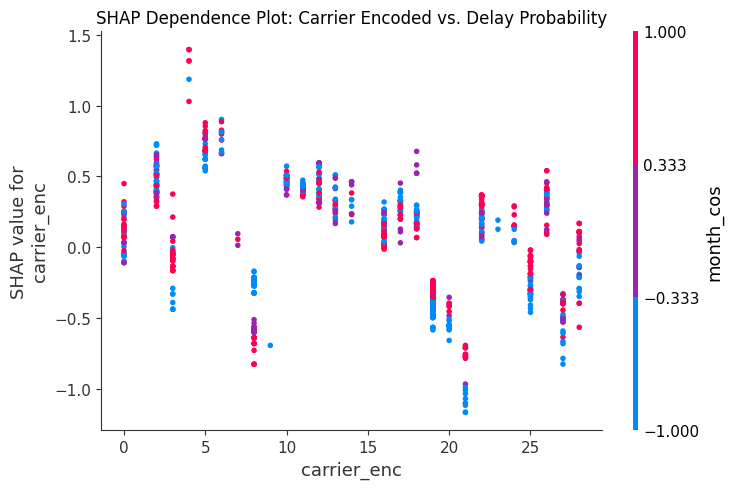


Performing SHAP analysis for Regression Model...

SHAP Summary Plot for Regression Model:


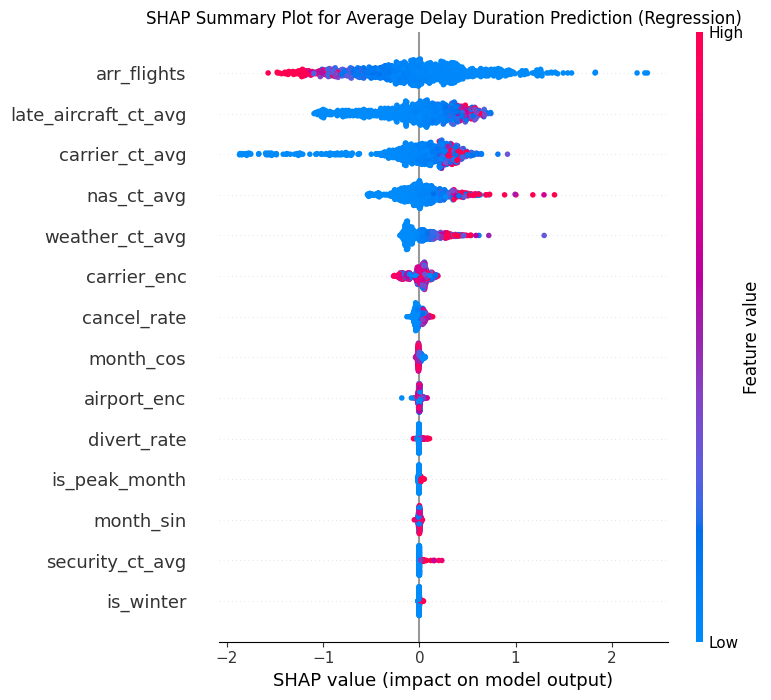


SHAP Dependence Plots for Regression Model (Examples):


<Figure size 800x600 with 0 Axes>

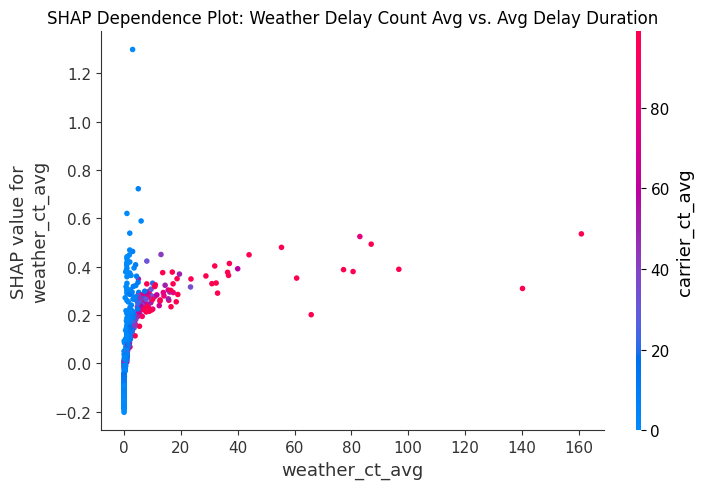

<Figure size 800x600 with 0 Axes>

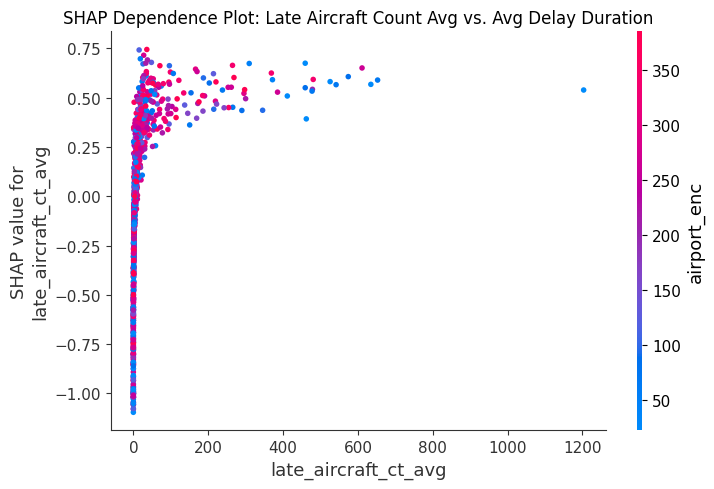

<Figure size 800x600 with 0 Axes>

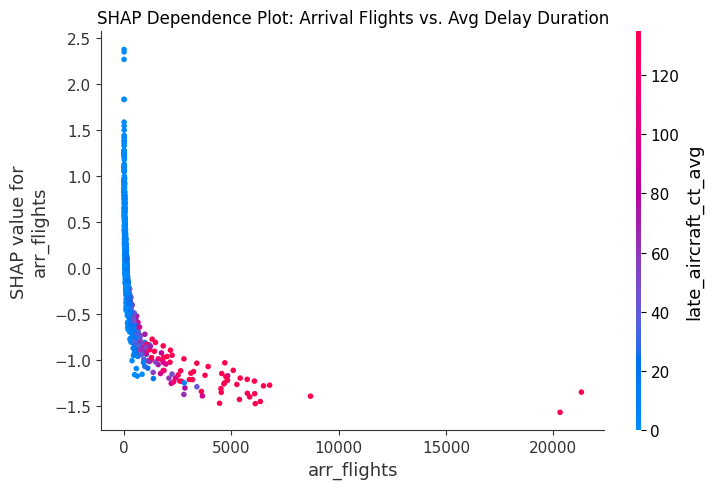


SHAP analysis complete. Review the generated plots.


In [109]:
import pandas as pd
import numpy as np
import joblib # For loading saved models
import shap # Requires: pip install shap
import matplotlib.pyplot as plt # For plotting
from sklearn.model_selection import train_test_split # Import train_test_split again
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder again

# Suppress warnings from SHAP, often related to plot rendering in non-notebook envs
shap.initjs() # For interactive JS plots (might not render in all environments)

# Make sure 'df' (your DataFrame) is loaded and available from previous steps.
# If running this cell independently, you might need to load df here:
# df = pd.read_csv('/content/drive/MyDrive/Airline_Delay_Cause.csv')
# Add preprocessing steps from your notebook here if needed before feature engineering.

# ---------------------------------------------
# 📋 Step 1: Data Preparation (Ensure consistency)
# ---------------------------------------------

# Ensure all necessary columns exist and are preprocessed consistently.
# Define features *before* splitting or using them for models/SHAP.

# Assuming 'df' is already preprocessed from earlier cells up to Feature Engineering.
# Recreate necessary features if this cell is run standalone or after kernel restart.
if 'month' not in df.columns:
     df['month'] = pd.to_datetime(df['Month_Year'], format='%m/%Y').dt.month
if 'year' not in df.columns:
    df['year'] = pd.to_datetime(df['Month_Year'], format='%m/%Y').dt.year

# 1a. Encode month cyclically
df['month_num'] = df['month']
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

# 1b. Encode carrier
# Assuming le_carrier was fitted on the full df['carrier'].astype(str) previously.
# Load it if saved, otherwise refit.
try:
    le_carrier = joblib.load("le_carrier.pkl")
    df['carrier_enc'] = le_carrier.transform(df['carrier'].astype(str))
    print("Loaded le_carrier.pkl")
except FileNotFoundError:
    print("le_carrier.pkl not found. Re-fitting le_carrier.")
    le_carrier = LabelEncoder()
    df['carrier_enc'] = le_carrier.fit_transform(df['carrier'].astype(str))
    joblib.dump(le_carrier, "le_carrier.pkl") # Save after re-fitting


# 1c. Add holiday month feature (using month_num which is now available)
df['is_peak_month'] = df['month_num'].isin([7, 8, 12]).astype(int)
# Ensure is_winter is also recreated if needed for features_cls/reg
df['is_winter'] = df['month_num'].isin([1, 2, 12]).astype(int)


# 1d. Target variable: is delayed (for classification)
# Assuming arr_del15 is already handled (dropna or fillna)
df['is_delayed'] = (df['arr_del15'] > 0).astype(int)


# 1e. Encode airport_name
# Assuming le_airport was fitted on the full df['airport_name'].astype(str) previously.
# Load it if saved, otherwise refit.
try:
    le_airport = joblib.load("le_airport.pkl")
    df['airport_enc'] = le_airport.transform(df['airport_name'].astype(str))
    print("Loaded le_airport.pkl")
except FileNotFoundError:
    print("le_airport.pkl not found. Re-fitting le_airport.")
    le_airport = LabelEncoder()
    df['airport_enc'] = le_airport.fit_transform(df['airport_name'].astype(str))
    joblib.dump(le_airport, "le_airport.pkl") # Save after re-fitting


# Handle missing values for numerical features used in models/SHAP
# Ensure these columns exist after previous steps
numerical_features_to_check = [
    'arr_flights', 'cancel_rate', 'divert_rate',
    'carrier_ct_avg', 'weather_ct_avg', 'nas_ct_avg', 'security_ct_avg', 'late_aircraft_ct_avg'
]
# Add check for existence before filling
for col in numerical_features_to_check:
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping imputation for SHAP.")
    elif df[col].isnull().any():
        df[col] = df[col].fillna(0)
        print(f"Filled NaNs in '{col}' with 0 for SHAP analysis.")


# --- Create the target variable for average delay per flight (for regression) ---
# Ensure arr_del15 and arr_flights are available and handled (e.g., no division by zero)
if 'arr_del15' in df.columns and 'arr_flights' in df.columns:
    df['avg_delay_per_flight'] = df.apply(
        lambda row: row['arr_del15'] / (row['arr_flights'] + 1e-6) if row['arr_flights'] >= 0 else 0, # Add small epsilon and handle negative flights defensively
        axis=1
    )

    # Cap negative average delays at 0 for regression target
    df['avg_delay_per_flight'][df['avg_delay_per_flight'] < 0] = 0

    # Log transform for regression target
    df['log_avg_delay_per_flight'] = np.log1p(df['avg_delay_per_flight'])
    target_reg = 'log_avg_delay_per_flight' # Define target_reg here
else:
     print("Warning: 'arr_del15' or 'arr_flights' not found. Skipping regression target creation.")
     target_reg = None # Set to None if target cannot be created


# ---------------------------------------------
# ✅ Step 2: Define features (CONSISTENTLY!) and load models
# ---------------------------------------------

# Define features *exactly* as used in the training steps
features_cls = [
    'month_sin', 'month_cos', 'carrier_enc', 'is_peak_month', 'airport_enc',
    'arr_flights', 'cancel_rate', 'divert_rate', 'is_winter' # Include is_winter if used in training
]

# Define features *exactly* as used in the training steps for regression
features_reg = [
    'month_sin', 'month_cos', 'carrier_enc', 'is_peak_month', 'airport_enc',
    'arr_flights',
    'is_winter' ,'cancel_rate' ,'divert_rate',
    'carrier_ct_avg', 'weather_ct_avg', 'nas_ct_avg', 'security_ct_avg', 'late_aircraft_ct_avg'
]


# Prepare X and y for splitting based on the *redefined* feature lists
if all(col in df.columns for col in features_cls) and target_cls in df.columns:
    X_cls = df[features_cls]
    y_cls = df[target_cls]

    # --- Split data (consistent with training) ---
    # Classification data split - ensure this matches the split used before SMOTE
    # X_train_cls, X_test_cls used *before* SMOTE for the initial split
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
        X_cls, y_cls, test_size=0.2, stratify=y_cls, random_state=42
    )
    print("Classification data split successfully.")
else:
     print("Warning: Not all classification features or target found. Skipping classification SHAP.")
     X_test_cls = None


if all(col in df.columns for col in features_reg) and target_reg and target_reg in df.columns:
    X_reg = df[features_reg]
    y_reg_transformed = df[target_reg]

    # Regression data split - ensure this matches the split used before scaling
    X_train_reg, X_test_reg, y_train_reg_transformed, y_test_reg_transformed = train_test_split(
        X_reg, y_reg_transformed, test_size=0.2, random_state=42
    )
    print("Regression data split successfully.")
else:
    print("Warning: Not all regression features or target found. Skipping regression SHAP.")
    X_test_reg = None


# --- Load Best Models ---
# Ensure the filenames exactly match what was saved during training
try:
    # Note: You saved best_xgboost_classifier.pkl from a training loop over *all* models.
    # The filename `best_xgboost_classifier.pkl` corresponds to the "XGBoost" key in your
    # `models` dictionary.
    best_xgb_classifier = joblib.load("best_xgboost_classifier.pkl")
    print("Loaded best_xgboost_classifier.pkl for classification SHAP.")
    # Ensure the loaded model was trained on the correct feature set size
    if X_test_cls is not None:
         expected_features = len(features_cls)
         actual_features = best_xgb_classifier.n_features_in_
         if actual_features != expected_features:
             print(f"Error: Classification model was trained on {actual_features} features, but test data has {expected_features}. SHAP may fail.")
             best_xgb_classifier = None # Invalidate model if feature count mismatch
except FileNotFoundError:
    print("best_xgboost_classifier.pkl not found. Skipping classification SHAP.")
    best_xgb_classifier = None
except Exception as e:
     print(f"Error loading best_xgboost_classifier.pkl: {e}. Skipping classification SHAP.")
     best_xgb_classifier = None


try:
    # Note: You saved regression models with filenames like `best_regressor_xgboost_regressor.pkl`.
    # You specifically load `best_xgboost_regressor_avg_delay_ct_features.pkl` which
    # *does not* match the saved filenames from the previous cell.
    # The saved filename for XGBoost Regressor should be `best_regressor_xgboost_regressor.pkl`.
    # If you *intended* to save it with the longer name, ensure that was done in the training cell.
    # Assuming the saved filename is `best_regressor_xgboost_regressor.pkl` based on the training loop:
    best_xgb_regressor_filename = "best_regressor_xgboost_regressor.pkl" # Correct filename based on training loop
    best_xgb_regressor = joblib.load(best_xgb_regressor_filename)
    print(f"Loaded {best_xgb_regressor_filename} for regression SHAP.")
    # Ensure the loaded model was trained on the correct feature set size
    if X_test_reg is not None:
         expected_features = len(features_reg)
         actual_features = best_xgb_regressor.n_features_in_
         if actual_features != expected_features:
             print(f"Error: Regression model was trained on {actual_features} features, but test data has {expected_features}. SHAP may fail.")
             best_xgb_regressor = None # Invalidate model if feature count mismatch
except FileNotFoundError:
    print(f"{best_xgb_regressor_filename} not found. Skipping regression SHAP.")
    best_xgb_regressor = None
except Exception as e:
     print(f"Error loading {best_xgb_regressor_filename}: {e}. Skipping regression SHAP.")
     best_xgb_regressor = None


# ---------------------------------------------
# ✅ Step 3: Perform SHAP Analysis for Classification Model
# ---------------------------------------------
# Only proceed if the model and test data are available and match
if best_xgb_classifier and X_test_cls is not None and best_xgb_classifier.n_features_in_ == len(features_cls):
    print(f"\n{'='*50}\nPerforming SHAP analysis for Classification Model...\n{'='*50}")

    # Use a subset of the test data for faster SHAP calculation
    shap_sample_cls = X_test_cls.sample(n=min(1000, len(X_test_cls)), random_state=42)

    # Create a SHAP explainer object.
    explainer_cls = shap.TreeExplainer(best_xgb_classifier)

    # Calculate SHAP values for the sampled test data
    # Specify the data used for calculating background distribution if possible for better results,
    # but using the test sample is often sufficient for visualization.
    # Use check_additivity=False to avoid warnings with complex tree structures sometimes
    shap_values_cls = explainer_cls.shap_values(shap_sample_cls, check_additivity=False)

    print("\nSHAP Summary Plot for Classification Model:")
    # Summary plot: Shows global feature importance and direction of impact
    # Class 1 (delayed) is typically the positive class. shap_values_cls will be a list [shap_for_class_0, shap_for_class_1]
    # We want the SHAP values for class 1 (delayed)
    plt.figure(figsize=(10, 8))
    # If the model is binary classifier, shap_values_cls will be a list of two arrays. Use the second array for the positive class (1).
    if isinstance(shap_values_cls, list) and len(shap_values_cls) == 2:
         shap.summary_plot(shap_values_cls[1], shap_sample_cls, show=False, feature_names=features_cls) # Pass feature names for clarity
    else:
         # This case might happen for multi-class, but XGBoost binary normally gives list of 2
         shap.summary_plot(shap_values_cls, shap_sample_cls, show=False, feature_names=features_cls)
    plt.title("SHAP Summary Plot for Flight Delay Prediction (Classification)")
    plt.tight_layout()
    plt.show()

    # --- SHAP Dependence Plots (Examples for Classification) ---
    print("\nSHAP Dependence Plots for Classification Model (Examples):")

    # Example 1: Impact of 'airport_enc' on delay prediction
    if 'airport_enc' in shap_sample_cls.columns and 'arr_flights' in shap_sample_cls.columns:
         plt.figure(figsize=(8, 6))
         # Use the SHAP values for class 1
         if isinstance(shap_values_cls, list):
             shap.dependence_plot("airport_enc", shap_values_cls[1], shap_sample_cls, interaction_index="arr_flights", show=False)
         else:
             shap.dependence_plot("airport_enc", shap_values_cls, shap_sample_cls, interaction_index="arr_flights", show=False)
         plt.title("SHAP Dependence Plot: Airport Encoded vs. Delay Probability")
         plt.tight_layout()
         plt.show()
    else:
         print("Skipping Airport Dependence Plot: Required columns not found.")


    # Example 2: Impact of 'month_sin' on delay prediction
    if 'month_sin' in shap_sample_cls.columns:
        plt.figure(figsize=(8, 6))
        if isinstance(shap_values_cls, list):
             shap.dependence_plot("month_sin", shap_values_cls[1], shap_sample_cls, show=False)
        else:
             shap.dependence_plot("month_sin", shap_values_cls, shap_sample_cls, show=False)
        plt.title("SHAP Dependence Plot: Month (Sine) vs. Delay Probability")
        plt.tight_layout()
        plt.show()
    else:
         print("Skipping Month_sin Dependence Plot: Required columns not found.")

    # Example 3: Impact of 'carrier_enc' on delay prediction
    if 'carrier_enc' in shap_sample_cls.columns:
        plt.figure(figsize=(8, 6))
        if isinstance(shap_values_cls, list):
             shap.dependence_plot("carrier_enc", shap_values_cls[1], shap_sample_cls, show=False)
        else:
             shap.dependence_plot("carrier_enc", shap_values_cls, shap_sample_cls, show=False)
        plt.title("SHAP Dependence Plot: Carrier Encoded vs. Delay Probability")
        plt.tight_layout()
        plt.show()
    else:
         print("Skipping Carrier_enc Dependence Plot: Required columns not found.")

else:
    print("Skipping Classification SHAP: Model not loaded correctly or feature mismatch.")


# ---------------------------------------------
# ✅ Step 4: Perform SHAP Analysis for Regression Model
# ---------------------------------------------
# Only proceed if the model and test data are available and match
if best_xgb_regressor and X_test_reg is not None and best_xgb_regressor.n_features_in_ == len(features_reg):
    print(f"\n{'='*50}\nPerforming SHAP analysis for Regression Model...\n{'='*50}")

    # Use a subset of the test data for faster SHAP calculation
    shap_sample_reg = X_test_reg.sample(n=min(1000, len(X_test_reg)), random_state=42)

    explainer_reg = shap.TreeExplainer(best_xgb_regressor)
    # Regression models usually return a single array of SHAP values
    shap_values_reg = explainer_reg.shap_values(shap_sample_reg, check_additivity=False)

    print("\nSHAP Summary Plot for Regression Model:")
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values_reg, shap_sample_reg, show=False, feature_names=features_reg) # Pass feature names
    plt.title("SHAP Summary Plot for Average Delay Duration Prediction (Regression)")
    plt.tight_layout()
    plt.show()

    # --- SHAP Dependence Plots (Examples for Regression) ---
    print("\nSHAP Dependence Plots for Regression Model (Examples):")

    # Example 1: Impact of 'weather_ct_avg' on average delay duration
    # Note: Use 'weather_ct_avg' as per regression features_reg list
    if 'weather_ct_avg' in shap_sample_reg.columns:
         plt.figure(figsize=(8, 6))
         shap.dependence_plot("weather_ct_avg", shap_values_reg, shap_sample_reg, show=False)
         plt.title("SHAP Dependence Plot: Weather Delay Count Avg vs. Avg Delay Duration")
         plt.tight_layout()
         plt.show()
    else:
         print("Skipping Weather Dependence Plot: 'weather_ct_avg' not found.")


    # Example 2: Impact of 'late_aircraft_ct_avg' on average delay duration
    # Color by another feature to see interaction (e.g., 'airport_enc')
    if 'late_aircraft_ct_avg' in shap_sample_reg.columns and 'airport_enc' in shap_sample_reg.columns:
        plt.figure(figsize=(8, 6))
        shap.dependence_plot("late_aircraft_ct_avg", shap_values_reg, shap_sample_reg, interaction_index="airport_enc", show=False)
        plt.title("SHAP Dependence Plot: Late Aircraft Count Avg vs. Avg Delay Duration")
        plt.tight_layout()
        plt.show()
    else:
         print("Skipping Late Aircraft Dependence Plot: Required columns not found.")


    # Example 3: Impact of 'arr_flights' on average delay duration
    if 'arr_flights' in shap_sample_reg.columns:
        plt.figure(figsize=(8, 6))
        shap.dependence_plot("arr_flights", shap_values_reg, shap_sample_reg, show=False)
        plt.title("SHAP Dependence Plot: Arrival Flights vs. Avg Delay Duration")
        plt.tight_layout()
        plt.show()
    else:
         print("Skipping Arrival Flights Dependence Plot: 'arr_flights' not found.")

else:
    print("Skipping Regression SHAP: Model not loaded correctly or feature mismatch.")

print("\nSHAP analysis complete. Review the generated plots.")